<a href="https://colab.research.google.com/github/LanceAlcala/CPEN-research/blob/main/DNN_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tuning DNN Parameters

<ipython-input-5-df810ce4e6eb>:67: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


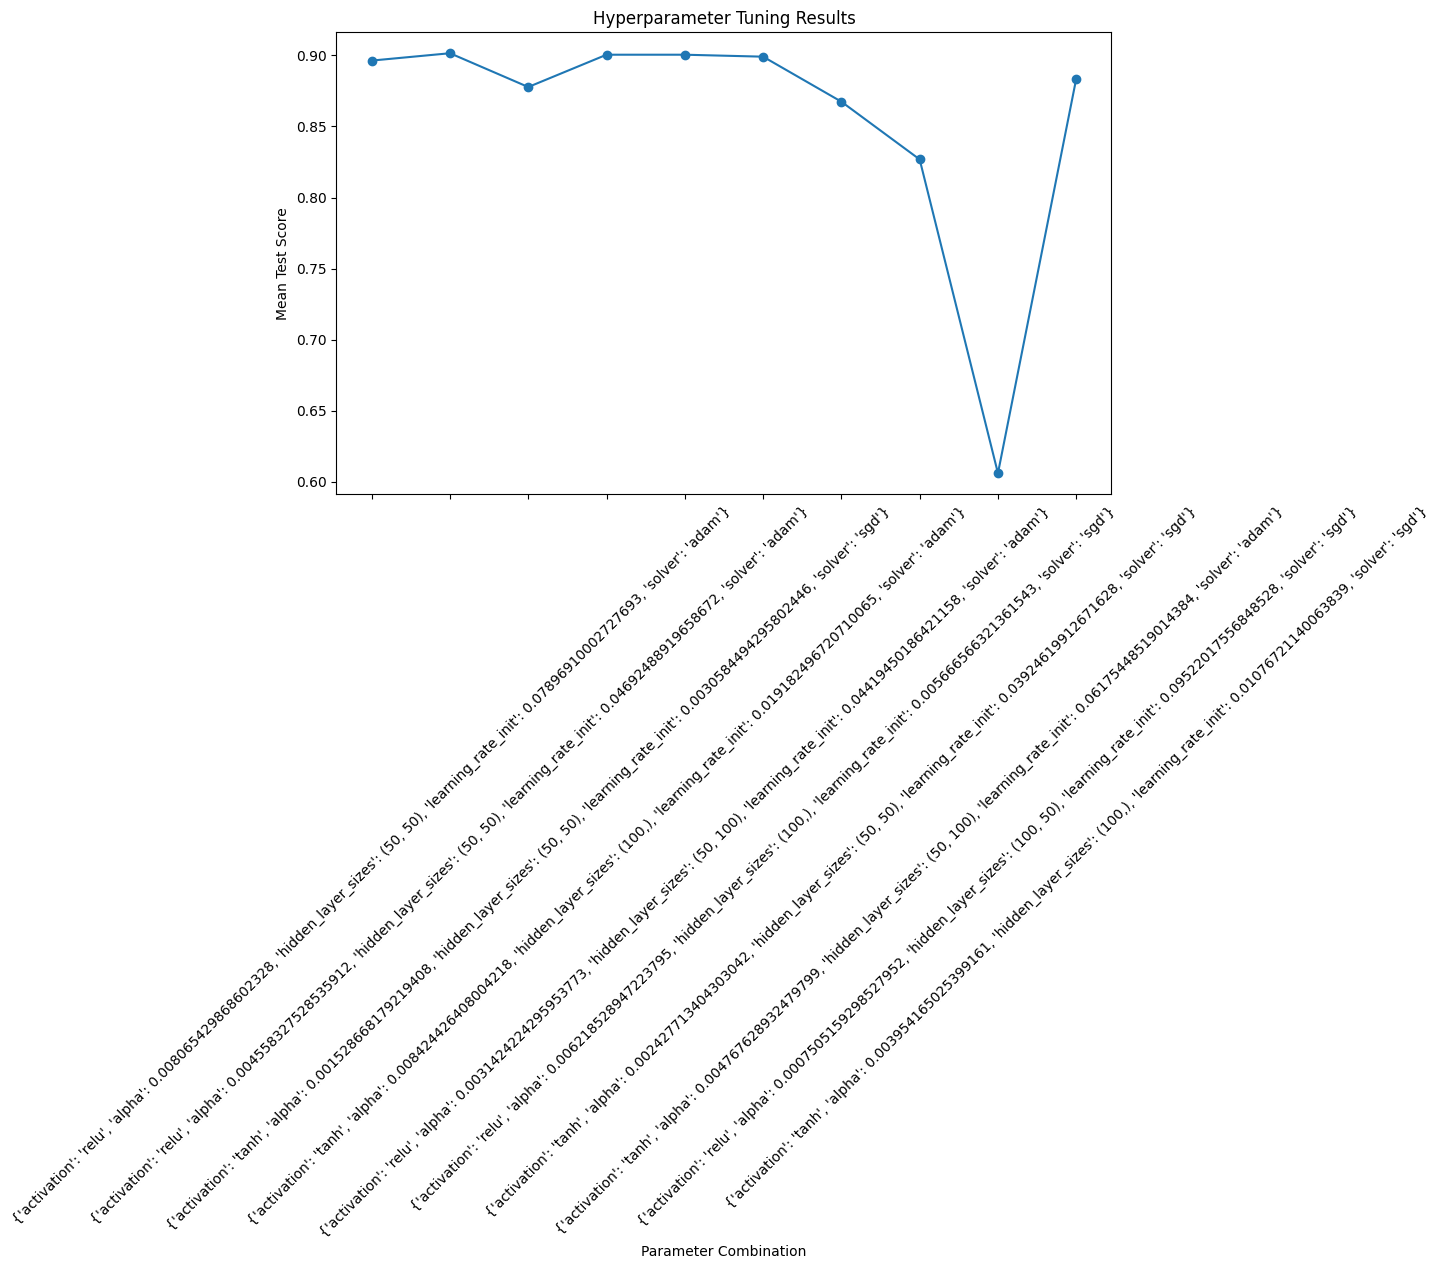

Best parameters:  {'activation': 'relu', 'alpha': 0.004558327528535912, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.04692488919658672, 'solver': 'adam'}
Best score:  0.9015175974835301
Test set accuracy:  0.90633608815427


In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from enum import auto
import io
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv("/content/dataset.csv")

specific_word = 'Enrolled'
condition = np.logical_not(np.any(dataset == specific_word, axis=1))
filtered_dataset = dataset[condition]

y = filtered_dataset['Target']
del filtered_dataset['Target']
X = filtered_dataset.values

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)
cluster_labels = kmeans.labels_

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test, train_labels, test_labels = train_test_split(
    X, y, cluster_labels, test_size=0.2, random_state=42
)
k = 20
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

# Define the parameter distributions
parameter_distribution = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (50, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': uniform(0.0001, 0.01),
    'learning_rate_init': uniform(0.001, 0.1),
}

# Create the classifier
classifier = MLPClassifier(random_state=42, max_iter=5000)

# Perform random search to find the best hyperparameters
random_search = RandomizedSearchCV(classifier, parameter_distribution, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

mean_scores = random_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(mean_scores)), mean_scores, marker='o')
plt.xticks(np.arange(len(mean_scores)), random_search.cv_results_['params'], rotation=45)
plt.xlabel('Parameter Combination')
plt.ylabel('Mean Test Score')
plt.title('Hyperparameter Tuning Results')
plt.tight_layout()
plt.show()

# Print the best parameters and best score
print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

# Evaluate the model on the test set
accuracy = random_search.score(X_test, y_test)
print("Test set accuracy: ", accuracy)